<a href="https://colab.research.google.com/github/jaskiratkalra26/Music-Recommendation-System/blob/main/Music_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('ex.csv',encoding="ISO-8859-1")
df.head(5)

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8/10
1,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0/10
2,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7/10
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1/10
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2/10


In [ ]:
df['Album/Movie'] = df['Album/Movie'].apply(lambda x:x.replace(' ','').lower())
df['Singer/Artists'] = df['Singer/Artists'].apply(lambda x:x.replace(' ','').lower())
df['Singer/Artists'] = df['Singer/Artists'].apply(lambda x:x.replace(',',' '))
df['Genre'] = df['Genre'].apply(lambda x:x.replace(' ','').lower())
df.head(5)

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating,name,features
0,Aankh Marey,kumarsanumikasinghnehakakkar,bollywooddance,simmba,8.8,Aankh Marey,kumarsanu mikasingh nehakakkar bollywooddance ...
1,Coca Cola,nehakakkartonykakkar,bollywooddanceromantic,lukachuppi,9.0,Coca Cola,nehakakkar tonykakkar bollywooddanceromantic l...
2,Apna Time Aayega,ranveersingh,bollywooddance,gullyboy,9.7,Apna Time Aayega,ranveersingh bollywooddance gullyboy 9.7
3,Mungda,jyoticatangrishaansubhroganguly,bollywooddance,totaldhamaal,9.1,Mungda,jyoticatangri shaan subhroganguly bollywooddan...
4,Tere Bin,aseeskaurrahatfatehalikhantanishkbagchi,bollywoodromantic,simmba,9.2,Tere Bin,aseeskaur rahatfatehalikhan tanishkbagchi boll...


In [ ]:
df['Genre'].unique()

array(['bollywooddance', 'bollywooddanceromantic', 'bollywoodromantic',
       'bollywood', 'bollywooddevotional', 'bollywoodromanticsad',
       'bollywooddancesad', 'bollywoodsad', 'bollywoodmotivational',
       'bollywoodromance', 'bollywoodsensual', 'bollywoodpatriotic',
       'bollywoodromanticsadsensual', 'bollywoodromanticsensual',
       'bollywooddancepatriotic', 'bollywoodmotivationalpatriotic',
       'bollywooddancesensual', 'bollywooddevotionalsad',
       'bollywooddancemotivationalpatriotic', 'bollywoodpatrioticsad'],
      dtype=object)

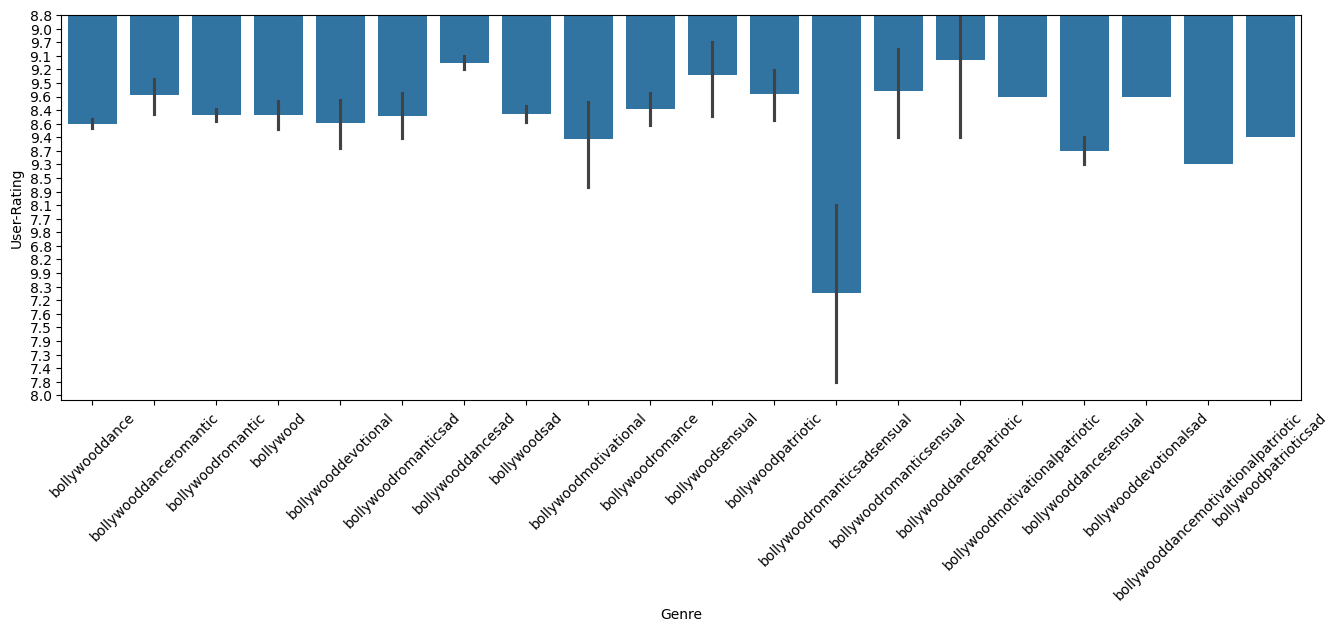

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
sns.barplot(x = df['Genre'],y= df['User-Rating'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()
len(df)


2391

In [ ]:
df['User-Rating'] = df['User-Rating'].apply(lambda x:x[0:3])
df.head(5)

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating,name,features
0,Aankh Marey,kumarsanu mikasingh nehakakkar,bollywooddance,simmba,8.8,Aankh Marey,kumarsanu mikasingh nehakakkar bollywooddance ...
1,Coca Cola,nehakakkar tonykakkar,bollywooddanceromantic,lukachuppi,9.0,Coca Cola,nehakakkar tonykakkar bollywooddanceromantic l...
2,Apna Time Aayega,ranveersingh,bollywooddance,gullyboy,9.7,Apna Time Aayega,ranveersingh bollywooddance gullyboy 9.7
3,Mungda,jyoticatangri shaan subhroganguly,bollywooddance,totaldhamaal,9.1,Mungda,jyoticatangri shaan subhroganguly bollywooddan...
4,Tere Bin,aseeskaur rahatfatehalikhan tanishkbagchi,bollywoodromantic,simmba,9.2,Tere Bin,aseeskaur rahatfatehalikhan tanishkbagchi boll...


In [ ]:
df['name'] = df['Song-Name']
df['features'] = df['Singer/Artists']+ ' '+ df['Genre']+ ' '+df['Album/Movie']+ ' '+ df['User-Rating']


In [ ]:
newdf = df[['name','features']]
newdf.head(5)
newdf['name'] = newdf['name'].apply(lambda x:x.strip())

<ipython-input-6-da7afb1c2515>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['name'] = newdf['name'].apply(lambda x:x.strip())


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
transformed= cv.fit_transform(newdf['features']).toarray()
transformed[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(transformed)
print(len((similarity[0])))
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

2391


[(5, 0.5163977794943223),
 (34, 0.5163977794943223),
 (184, 0.5163977794943223),
 (269, 0.5163977794943223),
 (371, 0.5163977794943223)]

In [ ]:
def recommend(music):
  music_index = newdf[newdf['name']==music].index[0]
  distances = similarity[music_index]
  music_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
  for i in music_list:
    print(newdf['name'][i[0]])

In [ ]:
recommend('Coca Cola')


Mile Ho Tum (Reprise)
La La La (Baazaar)
Aap Se Milkar
Dhoom Dhadakka
Aaoge Jab Tum


In [ ]:
import pickle
with open('recommendation_system.pkl', 'wb') as file:
    pickle.dump({'newdf': newdf, 'similarity': similarity}, file)
    file.close()


/bin/bash: line 1: 1s: command not found
